In [1]:
import numpy as np
import pandas as pd

def normalize_matrix(matrix):
    norm_matrix = matrix / np.sqrt((matrix ** 2).sum(axis=0))
    return norm_matrix

def calculate_topsis(matrix, weights, beneficial_criteria):
    norm_matrix = normalize_matrix(matrix)
    weighted_matrix = norm_matrix * weights
    
    ideal_best = np.where(beneficial_criteria, weighted_matrix.max(axis=0), weighted_matrix.min(axis=0))
    ideal_worst = np.where(beneficial_criteria, weighted_matrix.min(axis=0), weighted_matrix.max(axis=0))
    
    dist_best = np.sqrt(((weighted_matrix - ideal_best) ** 2).sum(axis=1))
    dist_worst = np.sqrt(((weighted_matrix - ideal_worst) ** 2).sum(axis=1))
    
    topsis_score = dist_worst / (dist_best + dist_worst)
    return topsis_score

# Decision matrix (Rows: Models, Columns: Criteria)
data = {
    "Model": ["BART", "T5", "Pegasus", "GPT-3.5"],
    "ROUGE-1": [45.6, 47.3, 49.2, 50.5],
    "ROUGE-2": [22.5, 24.1, 25.7, 26.3],
    "ROUGE-L": [42.3, 43.8, 45.1, 46.2],
    "BLEU": [18.2, 20.5, 22.0, 23.8],
    "Inference Time": [1.2, 1.5, 1.8, 3.0],  # Lower is better
    "Model Size": [1.5, 2.1, 1.8, 10.0]  # Lower is better
}

df = pd.DataFrame(data)

# Convert dataframe to numpy array (excluding the Model column)
matrix = df.iloc[:, 1:].values

# Assign weights to criteria
weights = np.array([0.2, 0.2, 0.2, 0.2, 0.1, 0.1])

# Define beneficial criteria (True for metrics where higher is better)
beneficial_criteria = np.array([True, True, True, True, False, False])

# Compute TOPSIS scores
topsis_scores = calculate_topsis(matrix, weights, beneficial_criteria)

df["TOPSIS Score"] = topsis_scores

df = df.sort_values(by="TOPSIS Score", ascending=False)

# Display ranked models
print(df[["Model", "TOPSIS Score"]])


     Model  TOPSIS Score
2  Pegasus      0.828609
1       T5      0.794997
0     BART      0.735470
3  GPT-3.5      0.264530


In [3]:
df.to_csv("topsis_results.csv", index=False)


C:\Users\Dell\AppData\Local\Temp\ipykernel_17768\831640399.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df["TOPSIS Score"], x=df["Model"], palette="viridis")


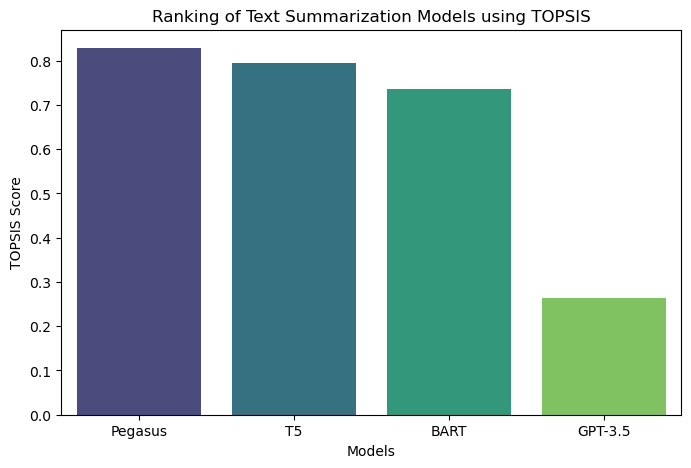

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.barplot(y=df["TOPSIS Score"], x=df["Model"], palette="viridis")
plt.ylabel("TOPSIS Score")
plt.xlabel("Models")
plt.title("Ranking of Text Summarization Models using TOPSIS")
plt.savefig("topsis_ranking.png")
plt.show()
